In [3]:
# 显卡加速库
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matlab.engine
import numpy as np

In [36]:
rssi = pd.read_excel('JUIndoor-Test-AllData-zheng.xlsx');
#将rssi中第4列到最后一列的数据提取出来
rssi = rssi.iloc[:, 3:];

fgpt = pd.read_excel('JUIndoorLoc-Training-AllData-zheng.xlsx');
fgpt = fgpt.iloc[:, 3:];
fgpt

dm = pd.read_excel('JUIndoorLoc-Training-AllData-zheng.xlsx');
dm = dm.iloc[:, 1:3];
dm

# 用目录下的WKNN.m文件方法进行测试
#[xwknn,ywknn,xknn,yknn] = WKNN(4, fgpt, dm, rssi);

,x轴,y轴
0,40,1
1,40,1
2,40,1
3,40,1
4,37,2
...,...,...
23899,38,21
23900,38,21
23901,38,21
23902,38,21


In [14]:
dm_3d = pd.read_excel('JUIndoorLoc-Training-AllData-zheng.xlsx');
dm_3d = dm_3d.iloc[:, 0:3]
dm_3d

,楼层,x轴,y轴
0,4,40,1
1,4,40,1
2,4,40,1
3,4,40,1
4,4,37,2
...,...,...,...
23899,4,38,21
23900,4,38,21
23901,4,38,21
23902,4,38,21


In [5]:
def WKNN(K, rssi_fgpt, rssi_dm, rssi):
    t1, t2 = rssi_fgpt.shape
    t3 = np.tile(rssi, (t1, 1))  # 观测点的信号强度值复制，形成一个与指纹库一样行的信号强度矩阵，便于同指纹比较
    temp1 = rssi_fgpt - t3
    wknn = np.sqrt(np.sum((temp1 ** 2), axis=1))
    LMAX = np.max(wknn)
    
    wknnfmt = np.zeros((K, 3))  # 存储最邻近指纹点的坐标
    xwknn = 0  # WKNN算法坐标
    ywknn = 0
    wknnsum = 0
    
    # 获取距离最小的K个匹配网格，并把相应坐标存于wknnfmt
    for k in range(K):
        L = np.min(wknn)
        M = np.argmin(wknn)
        wknnfmt[k, 0] = rssi_dm[M, 0]
        wknnfmt[k, 1] = rssi_dm[M, 1]
        wknnfmt[k, 2] = L
        wknn[M] = LMAX
        wknnsum += 1 / L
    
    # 获取带权重的估算坐标
    for k in range(K):
        xwknn += (1 / wknnfmt[k, 2]) / wknnsum * wknnfmt[k, 0]
        ywknn += (1 / wknnfmt[k, 2]) / wknnsum * wknnfmt[k, 1]
    
    xknn = 0  # KNN算法坐标
    yknn = 0
    
    # KNN近域算法坐标
    for k in range(K):
        xknn += wknnfmt[k, 0]
        yknn += wknnfmt[k, 1]
    
    xknn /= K
    yknn /= K
    
    return xwknn, ywknn, xknn, yknn

In [6]:
dm.to_numpy()

array([[40,  1],
       [40,  1],
       [40,  1],
       ...,
       [38, 21],
       [38, 21],
       [38, 21]], dtype=int64)

In [7]:
print(len(rssi))
xwknn = np.zeros(len(rssi))
ywknn = np.zeros(len(rssi))
xknn = np.zeros(len(rssi))
yknn = np.zeros(len(rssi))
for i in range(len(rssi)):
    # 将rssi中第i行数据提取出来
    rssii = rssi.iloc[i, :]
    xwknn[i], ywknn[i], xknn[i], yknn[i] = WKNN(4, fgpt.to_numpy(), dm.to_numpy(), rssii)
    # print(xwknn, ywknn, xknn, yknn)

1460


In [8]:
for i in range(len(rssi)):
    print(xwknn[i], ywknn[i])

33.090825550676854 13.454127753384272
33.0 13.0
33.0 13.0
33.0 13.0
33.00000000000001 13.0
33.0 13.0
33.0 13.0
33.00000000000001 13.000000000000002
33.83593965445542 13.000000000000002
34.0 13.0
34.0 13.000000000000002
34.00000000000001 13.0
34.00000000000001 13.0
34.0 13.000000000000002
34.0 13.0
34.0 13.0
35.0 12.999999999999998
35.0 12.999999999999998
35.0 13.000000000000002
35.00000000000001 13.000000000000002
35.00000000000001 13.000000000000004
35.0 13.0
35.0 13.0
35.0 13.0
36.0 13.0
36.0 13.000000000000002
36.0 13.0
36.0 12.999999999999998
36.00000000000001 13.369142832204107
36.0 13.000000000000002
36.0 13.0
36.210488119068856 13.21048811906886
36.99999999999999 12.999999999999996
37.0 13.0
37.0 13.0
37.0 12.999999999999998
37.0 13.0
37.0 13.0
36.99999999999999 12.999999999999998
36.99999999999999 12.999999999999998
37.0 14.0
37.0 13.999999999999998
37.0 14.0
37.00000000000001 14.0
37.0 14.171371654991534
37.00000000000001 14.0
37.0 13.999999999999998
36.99999999999999 18.99999

In [18]:
location = pd.read_excel('JUIndoor-Test-AllData-zheng.xlsx');
location = location.iloc[:, 0:3]
location

,楼层,x轴,y轴
0,4,33,13
1,4,33,13
2,4,33,13
3,4,33,13
4,4,33,13
...,...,...,...
1455,4,38,21
1456,4,38,21
1457,4,38,21
1458,4,38,21


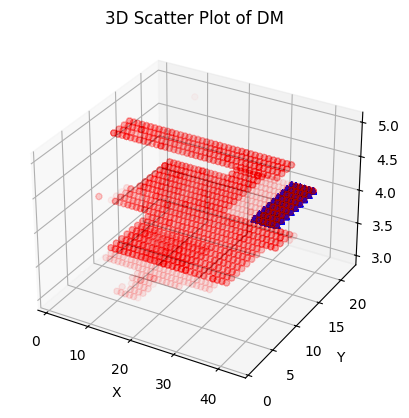

In [29]:
# 用dm_3d中的数据绘制三维散点图，以dm_3d的第一列为z，后两列分别为xy
# 将location中的点也一样绘制在同一张图中
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 # 红色的点加透明度，点的大小改小
ax.scatter(dm_3d.iloc[:,1], dm_3d.iloc[:, 2], dm_3d.iloc[:,0], c='r', marker='o', alpha=0.01) 
ax.scatter(location.iloc[:, 1], location.iloc[:, 2], location.iloc[:, 0], c='b', marker='^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of DM')  
plt.show()

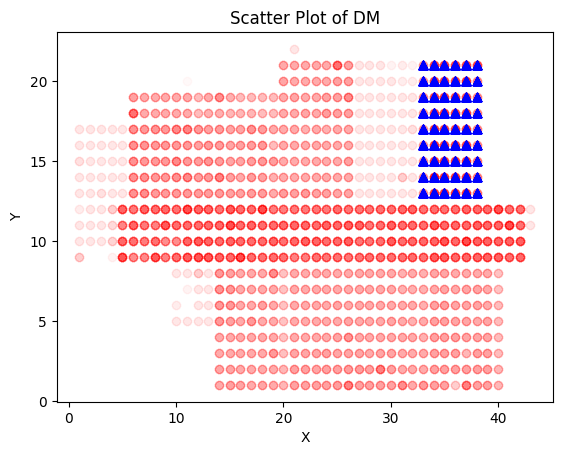

In [40]:
# 将dm和location中点画在同一张图
fig_ = plt.figure()
ax_ = fig_.add_subplot(111)
ax_.scatter(dm.iloc[:, 0], dm.iloc[:, 1], c='r', marker='o', alpha=0.01)
ax_.scatter(location.iloc[:, 1], location.iloc[:, 2], c='b', marker='^')
# 加上对两种标记的表示
plt.xlabel('X')
plt.ylabel('Y') 
plt.title('Scatter Plot of DM')

plt.show()

[4.63121255e-01 0.00000000e+00 0.00000000e+00 ... 3.55271368e-15
 0.00000000e+00 3.55271368e-15]


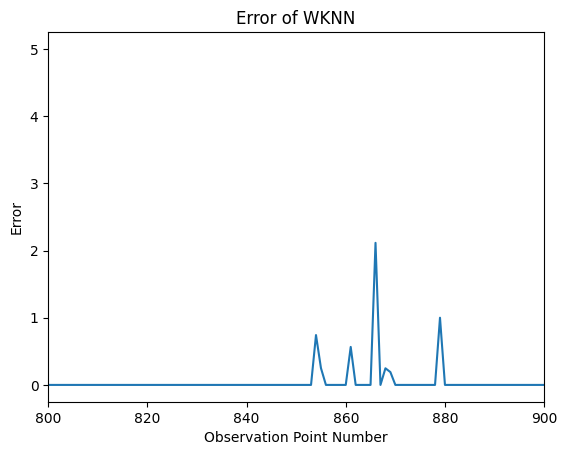

In [47]:
# 计算wknn误差
error = np.zeros(len(rssi))
for i in range(len(rssi)):
    error[i] = np.sqrt((xwknn[i] - location.iloc[i, 1]) ** 2 + (ywknn[i] - location.iloc[i, 2]) ** 2)
    # print(error[i])

print(error)
# 横轴是观测点编号，纵轴是误差值，在图上标记出横纵轴的含义
# 将横轴的现实范围减少一些
plt.xlim(800, 900)
plt.xlabel('Observation Point Number')
plt.ylabel('Error')
plt.title('Error of WKNN')
plt.plot(error)

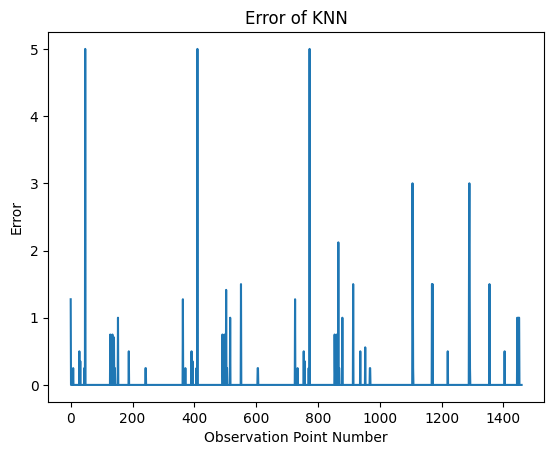

In [11]:
# 计算knn误差
error = np.zeros(len(rssi))
for i in range(len(rssi)):
    error[i] = np.sqrt((xknn[i] - location.iloc[i, 0]) ** 2 + (yknn[i] - location.iloc[i, 1]) ** 2)

plt.xlabel('Observation Point Number')
plt.ylabel('Error')
plt.title('Error of KNN')
plt.plot(error)